In [1]:
import numpy as np
import math
from matplotlib import pylab as plt
# from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
# from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
# from root_pandas import read_root
# import uproot
import time
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

from scipy import stats

In [2]:
# df5e = pd.read_pickle("electron5x5.pkl")
# print("read")
# df5g = pd.read_pickle("../PhS2_5x5/Gamma5x5.pkl")
# print("read")
# df10e = pd.read_pickle("electron10x10.pkl")
# print("read")
df10e = pd.read_pickle("../PhS2_10x10/Gamma10x10.pkl")
print("read")
# df20e = pd.read_pickle("electron20x20.pkl")
# print("read")
# df20g = pd.read_pickle("../PhS2_20x20/Gamma20x20.pkl")
# print("read")

read


In [3]:
df10e

,X,Y,dX,dY,Weight,Ekine
0,8.875000,15.421875,0.020874,0.028427,0.020004,3.330078
1,-14.687500,-3.492188,-0.050232,0.069336,0.020004,0.111328
2,1.917969,-15.992188,0.004704,-0.026215,0.020004,3.886719
3,-18.328125,14.812500,-0.034210,0.027039,0.020004,3.050781
4,-11.101562,18.703125,-0.022614,0.035797,0.020004,1.916992
...,...,...,...,...,...,...
129343542,-20.937500,-15.906250,-0.042542,-0.027756,0.020004,1.041992
129343543,17.265625,-19.828125,0.029541,-0.035156,0.020004,2.033203
129343544,9.789062,1.289062,0.016541,0.002724,0.020004,0.598145
129343545,-14.507812,15.484375,-0.157104,0.110596,0.000400,0.640625


In [124]:
# dfe10tot=df10e[['X','Y','dX','dY','Ekine','Weight']]
pd.set_option('mode.use_inf_as_na', True)


In [125]:
dfe10tot.index[np.isinf(dfe10tot).any(1)]
# dfe10tot.loc[[129168038]]

Int64Index([], dtype='int64')

In [126]:
dfe10tot=dfe10tot.dropna()


In [127]:
#dfe10tot=dfe10tot.head(129000000)

In [128]:
nparr=dfe10tot.to_numpy()
values=nparr.T

In [137]:
bandwidth=0.01

In [138]:
kde = stats.gaussian_kde(values,bw_method=bandwidth)

In [139]:
newsample = stats.gaussian_kde.resample(kde,1000000)


In [140]:
newdf=pd.DataFrame(newsample.T,columns=['X','Y','dX','dY','Ekine','Weight'])

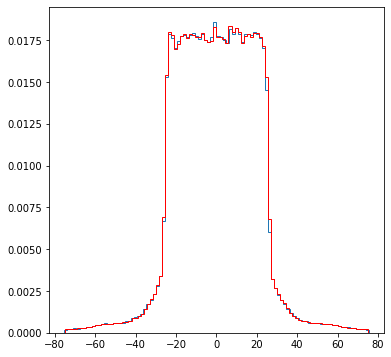

In [141]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf['X'],bins=100,histtype='step',density=True)
_=plt.hist(dfe10tot['X'],bins=100,histtype='step',color='red',density=True)

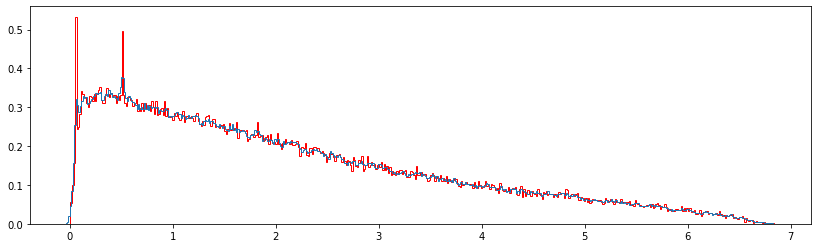

In [144]:
plt.figure(figsize=(14,4))
_=plt.hist(dfe10tot['Ekine'],bins=500,histtype='step',color='red',density=True)
_=plt.hist(newdf['Ekine'],bins=500,histtype='step',density=True)


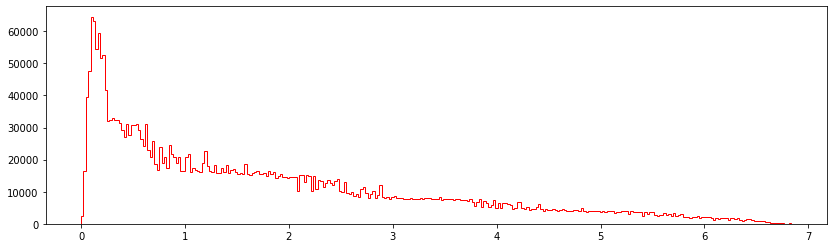

In [164]:
plt.figure(figsize=(14,4))
_=plt.hist(dfe10tot[dfe10tot['Weight']>0]['Ekine'],weights=dfe10tot[dfe10tot['Weight']>0]['Weight'],bins=300,histtype='step',color='red')
# _=plt.hist(newdf['Ekine'],weights=newdf['Weight'],bins=200,histtype='step',density=True,color='green')


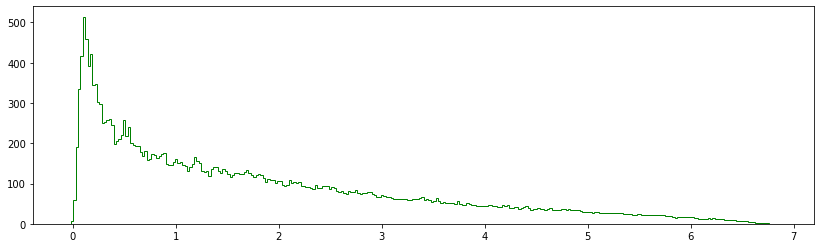

In [165]:
plt.figure(figsize=(14,4))
# _=plt.hist(dfe10tot[dfe10tot['Weight']>0.00001]['Ekine'],weights=dfe10tot[dfe10tot['Weight']>0.00001]['Weight'],bins=100,histtype='step',color='red')
_=plt.hist(newdf[newdf['Weight']>0]['Ekine'],weights=newdf[newdf['Weight']>0]['Weight'],bins=300,histtype='step',color='green')


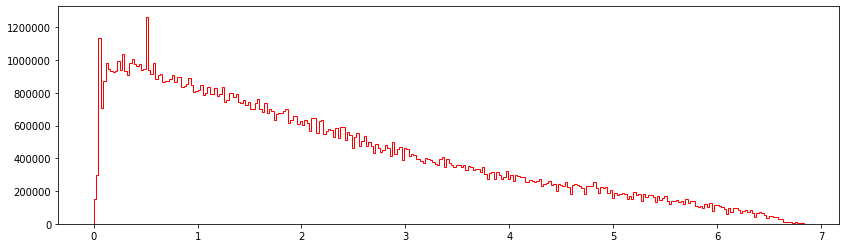

In [136]:
plt.figure(figsize=(14,4))

_=plt.hist(dfe10tot['Ekine'],bins=300,histtype='step',color='red')
